# Task 1: EDA and Business Insights

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
customers = pd.read_csv('C:/Users/dell/OneDrive/Desktop/ZeoTap/Customers.csv')
products = pd.read_csv('C:/Users/dell/OneDrive/Desktop/ZeoTap/Products.csv')
transactions = pd.read_csv('C:/Users/dell/OneDrive/Desktop/ZeoTap/Transactions.csv')

In [66]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [67]:
customers.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [68]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [69]:
products.tail()

,ProductID,ProductName,Category,Price
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29
99,P100,HomeSense Sweater,Clothing,126.34


In [70]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [71]:
transactions.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86


## Data Cleaning and Inspection

### Missing values

In [72]:
# Check missing values in Customers file
print('Missing values in each column: ')
print(customers.isnull().sum())

Missing values in each column: 
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [73]:
# Check missing values in Products file
print('Missing values in each column: ')
print(products.isnull().sum())

Missing values in each column: 
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [74]:
# Check missing values in Transactions file
print('Missing values in each column: ')
print(transactions.isnull().sum())

Missing values in each column: 
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Duplicates

In [75]:
# Check for duplicates in customers file 
dup1 = customers.duplicated()
print('Number of duplicate rows in customers file: ', dup1.sum())

Number of duplicate rows in customers file:  0


In [76]:
# Check for duplicates in products file 
dup2 = products.duplicated()
print('Number of duplicate rows in products file: ', dup2.sum())

Number of duplicate rows in products file:  0


In [77]:
# Check for duplicates in transactions file 
dup3 = products.duplicated()
print('Number of duplicate rows in transactions file: ', dup3.sum())

Number of duplicate rows in transactions file:  0


### Data Types

In [78]:
# Checking data types of each column
print('Data types of columns in customers file:')
print(customers.dtypes)

Data types of columns in customers file:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [79]:
# Checking data types of each column
print('Data types of columns in products file:')
print(products.dtypes)

Data types of columns in products file:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object


In [80]:
# Checking data types of each column
print('Data types of columns in transactions file:')
print(transactions.dtypes)

Data types of columns in transactions file:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


## Explore relationships

### Merge Datasets

In [81]:
# Merge transactions with customers on CustomerID
tran_cust = pd.merge(transactions, customers, on = 'CustomerID', how = 'left')

In [82]:
tran_cust.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [83]:
# Merge tran_cust with products on ProductID and Price
final_data = pd.merge(tran_cust, products, on = ['ProductID', 'Price'], how = 'left')

In [84]:
final_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


### Statistics

In [85]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [86]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [87]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


## Generate Visualizatins

### Top Selling products /categories

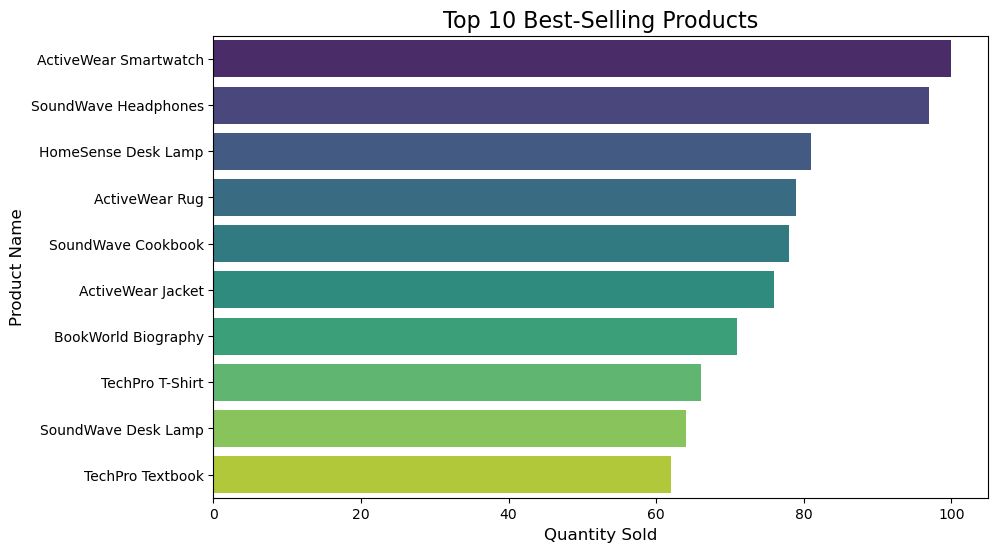

In [88]:
# Top-selling products by quantity
top_products = final_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

#plotting the top-selling products
plt.figure(figsize = (10, 6))
sns.barplot(
    x=top_products.values, 
    y=top_products.index, 
    hue=top_products.index,  # Assign the y variable to hue
    palette='viridis', 
    legend=False  # Turn off the legend
)
plt.title('Top 10 Best-Selling Products', fontsize = 16)
plt.xlabel('Quantity Sold', fontsize = 12)
plt.ylabel('Product Name', fontsize = 12)
plt.show()

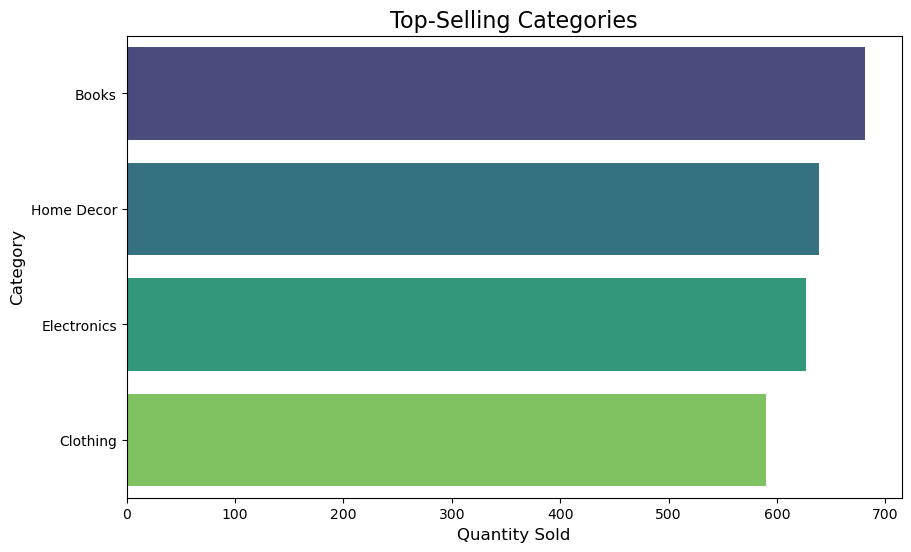

In [89]:
# Top-selling categories by quantity
top_categories = final_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

#plotting the top-selling categories
plt.figure(figsize = (10, 6))
sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    hue=top_categories.index,  # Assign the y variable to hue
    palette='viridis', 
    legend=False  # Turn off the legend
)
plt.title('Top-Selling Categories', fontsize = 16)
plt.xlabel('Quantity Sold', fontsize = 12)
plt.ylabel('Category', fontsize = 12)
plt.show()

### Analyze transaction trends over time with line plots.

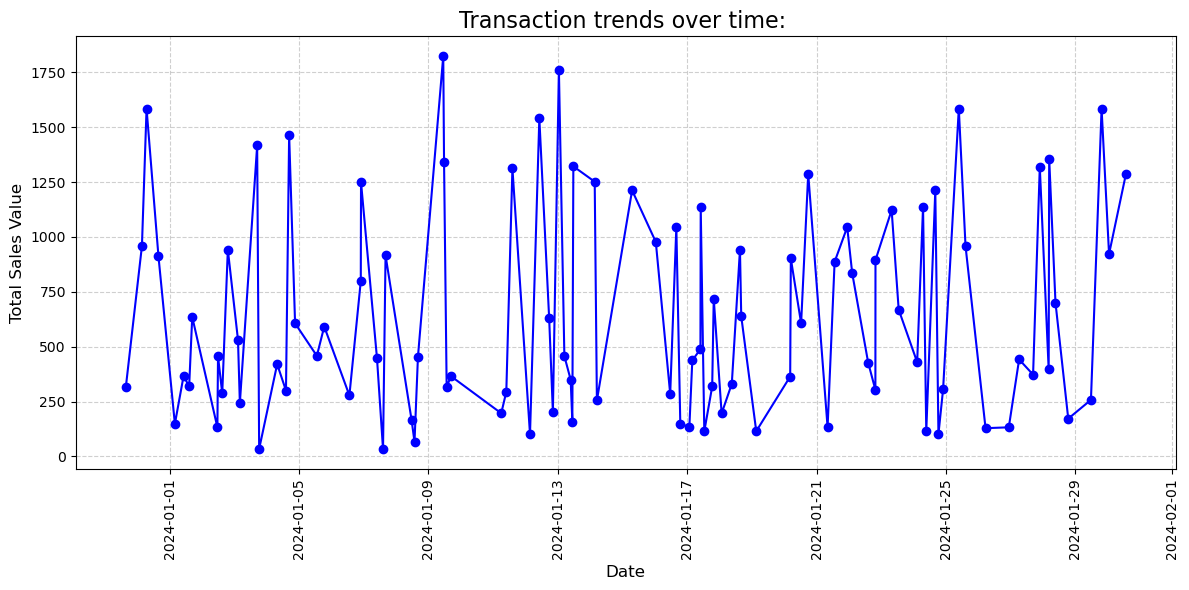

In [90]:
# Convert the TransactionDate column to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate data: Total sales value per date
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum().reset_index().head(100)

# Plot the trends
plt.figure(figsize = (12, 6))
plt.plot(daily_sales['TransactionDate'],
        daily_sales['TotalValue'], marker = 'o', color = 'b', linestyle = '-')
plt.title('Transaction trends over time: ',fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Total Sales Value', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Region-wise distribution of customers using pie or bar charts.

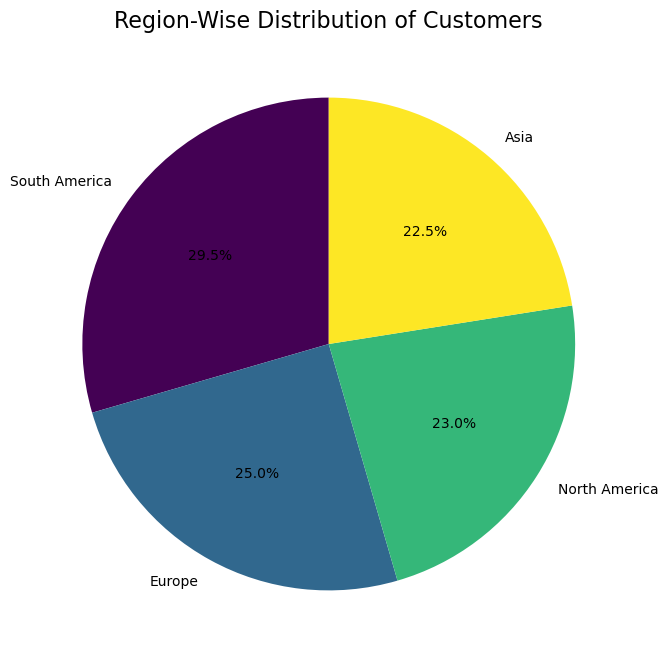

In [91]:
# Aggregate data by region
region_distribution = customers['Region'].value_counts()

# Pie Chart for region-wise distribution
plt.figure(figsize = (8, 8))
region_distribution.plot.pie(autopct = '%1.1f%%', startangle = 90, cmap = 'viridis', legend = False)
plt.title('Region-Wise Distribution of Customers', fontsize = 16)
plt.ylabel('')   # Hide the y-label for a cleaner pie chart
plt.show()

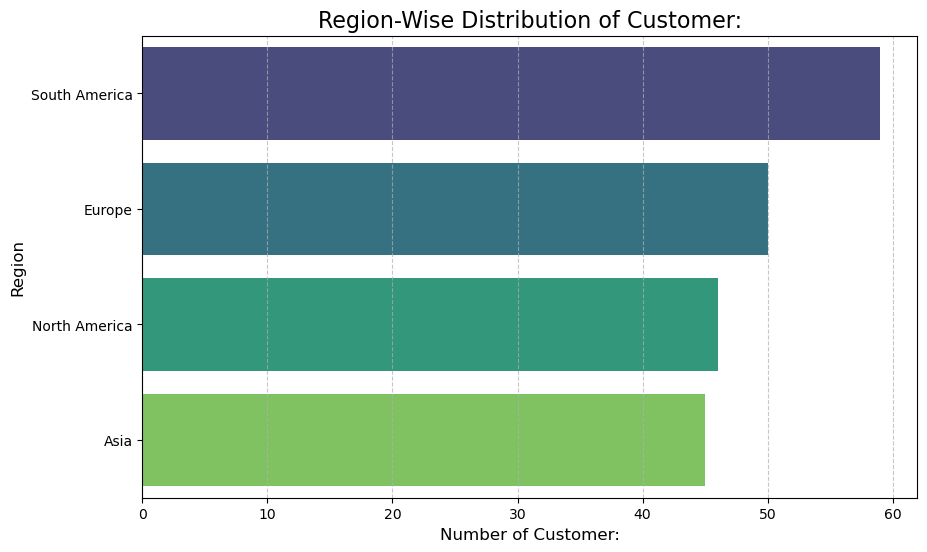

In [92]:
# Bar-Chart for region-wise distribution
plt.figure(figsize = (10, 6))
sns.barplot(x = region_distribution.values, y = region_distribution.index, hue = region_distribution.index, palette = 'viridis', legend = False)
plt.title('Region-Wise Distribution of Customer:', fontsize = 16)
plt.xlabel('Number of Customer:', fontsize = 12)
plt.ylabel('Region', fontsize = 12)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

## Business insights from the EDA

### 1: Profit for each product category

In [93]:
product_revenue = final_data.groupby('Category')['TotalValue'].sum().sort_values(ascending = False)
print('Profit for each product category:')
print(product_revenue)

Profit for each product category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


### 2: Regions contributing the most revenue

In [94]:
region_revenue = final_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Regions Contributing the Most Revenue:")
print(region_revenue)

Regions Contributing the Most Revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


### 3: Seasonality of transactions over months

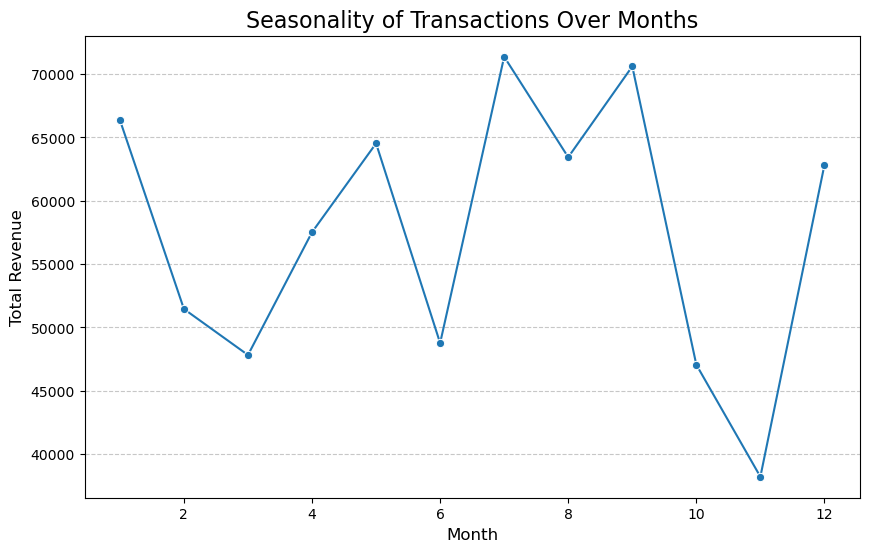

In [95]:
final_data['Month'] = pd.to_datetime(final_data['TransactionDate']).dt.month
monthly_revenue = final_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Seasonality of Transactions Over Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4: High-value customers (top 10%)

In [96]:
customer_spending = final_data.groupby('CustomerID')['TotalValue'].sum()
top_10_percent_threshold = customer_spending.quantile(0.9)
high_value_customers = customer_spending[customer_spending >= top_10_percent_threshold]
print("High-Value Customers (Top 10% by Spending):")
print(high_value_customers)

High-Value Customers (Top 10% by Spending):
CustomerID
C0013     6000.56
C0028     6819.57
C0041     6149.78
C0045     6021.80
C0054     8040.39
C0059     7073.28
C0065     7663.70
C0068     5950.42
C0082     7572.91
C0087     6604.23
C0096     6072.92
C0099     6715.72
C0102     6132.36
C0104     6579.10
C0141    10673.87
C0143     6044.63
C0156     7634.45
C0165     6708.10
C0175     6210.53
C0188     7111.32
Name: TotalValue, dtype: float64


### 5: Relationship between product price and quantity sold

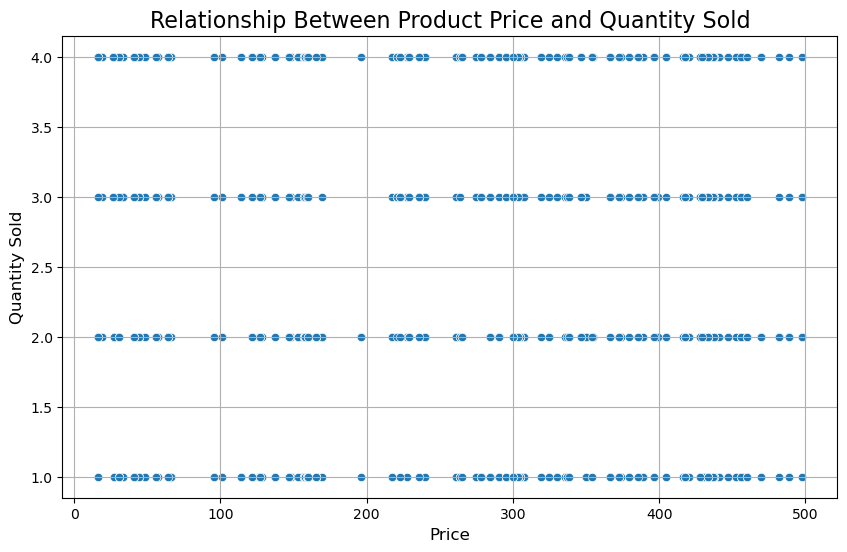

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_data['Price'], y=final_data['Quantity'])
plt.title('Relationship Between Product Price and Quantity Sold', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.grid(True)
plt.show()

In [98]:
# Correlation between price and quantity
correlation = final_data['Price'].corr(final_data['Quantity'])
print("Correlation Between Price and Quantity: ",correlation)

Correlation Between Price and Quantity:  -0.009378326167388635


### 6: Plot daily transactions

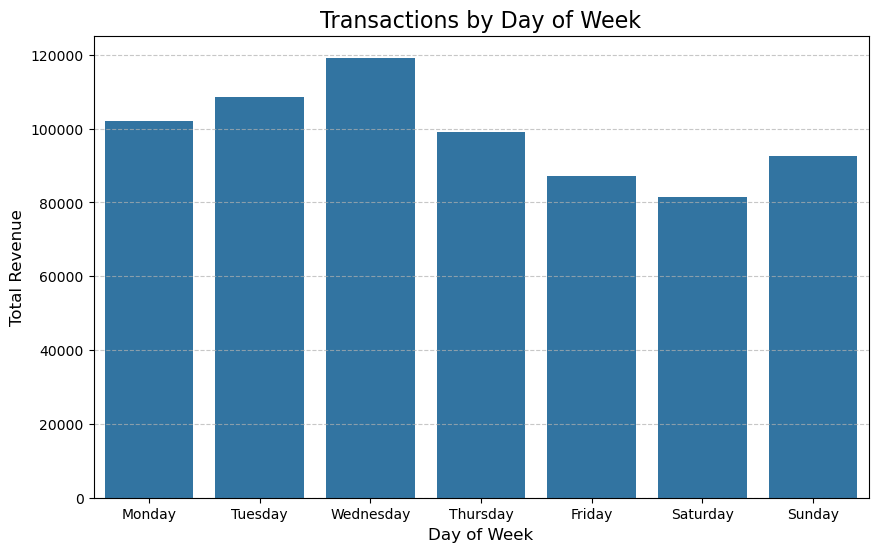

In [99]:
# Extract time and day information
final_data['TransactionHour'] = pd.to_datetime(final_data['TransactionDate']).dt.hour
final_data['DayOfWeek'] = pd.to_datetime(final_data['TransactionDate']).dt.day_name()

# Analyze peak transaction times
hourly_transactions = final_data.groupby('TransactionHour')['TotalValue'].sum()
daily_transactions = final_data.groupby('DayOfWeek')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_transactions.index, y=daily_transactions.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transactions by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 7: Plot peak transaction times

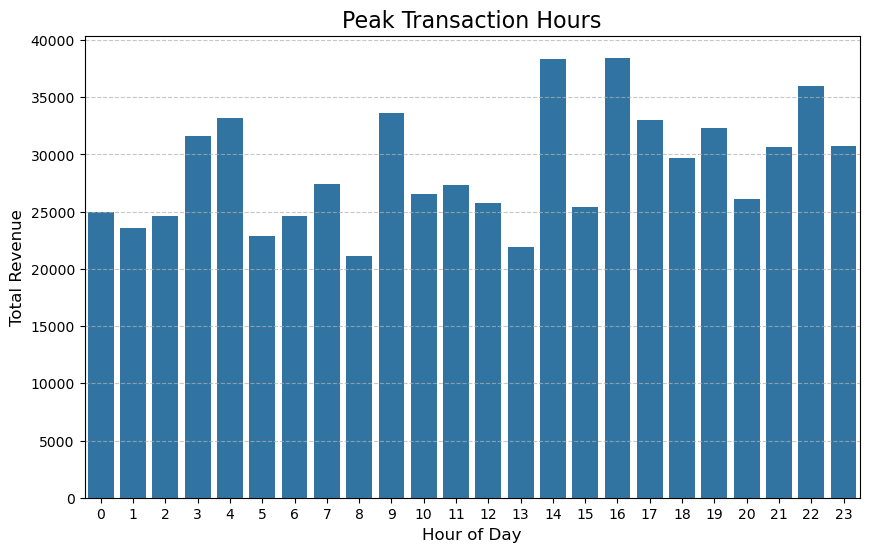

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values)
plt.title('Peak Transaction Hours', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()